### Dependências e Configurações

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['font.family'] = 'serif'
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 80
plt.style.use('tableau-colorblind10')
plt.ion()

# Etapa 1: Análise Exploratória

## Entendendo o contexto

Utilizaremos neste projeto a base de [Nascidos Vivos (SINASC)](https://basedosdados.org/dataset/br-ms-sinasc?bdm_table=microdados).

Os dados disponíveis são oriundos do Sistema de Informações sobre Nascidos Vivos (SINASC), sistema este gerido pelo Departamento de Análise de Situação de Saúde, da Secretaria de Vigilância em Saúde, em conjunto com as Secretarias Estaduais e Municipais de Saúde.

Ela cobre um período de tempo desde o ano de 1994 até 2021, mas nesse estudo focaremos apenas em dados posteriores à 2015.

In [ ]:
utilizarAmostra = True

if (utilizarAmostra):
    dicionario = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/dicionario_nascidos_vivos.csv')
    df = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/amostra_nascidos_vivos.csv')
else:
    dicionario = pd.read_csv('../datasets/dicionario_nascidos_vivos.csv')
    df = pd.read_csv('../datasets/nascidos_vivos_limpo.csv')

In [ ]:
df.head(20)

,ano,sigla_uf,local_nascimento,data_nascimento,hora_nascimento,sexo,peso,raca_cor,id_anomalia,codigo_anomalia,...,quantidade_filhos_mortos,idade_mae,escolaridade_mae,estado_civil_mae,ocupacao_mae,raca_cor_mae,gestacoes_ant,quantidade_parto_normal,quantidade_parto_cesareo,idade_pai
0,2015,MS,1,2015-11-09,16:41:00,1,3350.0,4.0,2.0,NaN,...,0.0,16.0,4.0,5.0,999991.0,4.0,1.0,0.0,1.0,18.0
1,2015,PA,1,2015-03-28,13:45:00,2,3000.0,4.0,2.0,NaN,...,0.0,31.0,3.0,5.0,999992.0,4.0,3.0,2.0,1.0,23.0
2,2019,SP,1,2019-01-17,01:20:00,1,3540.0,1.0,2.0,NaN,...,1.0,33.0,4.0,2.0,141410.0,1.0,2.0,0.0,1.0,27.0
3,2021,CE,1,2021-05-17,1437.0,2,3780.0,4.0,2.0,NaN,...,0.0,28.0,4.0,1.0,999992.0,4.0,1.0,0.0,1.0,NaN
4,2017,ES,1,2017-05-10,17:42:00,2,2585.0,4.0,2.0,NaN,...,0.0,36.0,4.0,1.0,517410.0,4.0,3.0,3.0,0.0,NaN
5,2021,BA,1,2021-03-28,2023.0,1,3380.0,4.0,2.0,NaN,...,NaN,35.0,4.0,1.0,411030.0,4.0,NaN,NaN,NaN,NaN
6,2020,SP,1,2020-03-09,07:30:00,1,3160.0,1.0,2.0,NaN,...,1.0,27.0,4.0,2.0,411010.0,1.0,2.0,0.0,1.0,NaN
7,2019,BA,1,2019-05-27,15:01:00,1,2814.0,4.0,2.0,NaN,...,NaN,36.0,4.0,1.0,999992.0,4.0,2.0,NaN,2.0,NaN
8,2019,AM,1,2019-05-03,17:15:00,1,3600.0,4.0,2.0,NaN,...,0.0,22.0,4.0,1.0,999992.0,4.0,1.0,1.0,0.0,NaN
9,2019,PE,1,2019-05-16,18:03:00,2,3015.0,1.0,2.0,NaN,...,0.0,20.0,4.0,2.0,611005.0,1.0,0.0,0.0,0.0,NaN


## Familiarização com os dados

  - Exploraramos a estrutura do conjunto de dados, verificando o número de variáveis (colunas) e observações (linhas).
  - Identificamos os tipos de dados presentes em cada variável (numérico, categórico, texto, etc.).

In [ ]:
df.head()

,ano,sigla_uf,local_nascimento,data_nascimento,hora_nascimento,sexo,peso,raca_cor,id_anomalia,codigo_anomalia,...,quantidade_filhos_mortos,idade_mae,escolaridade_mae,estado_civil_mae,ocupacao_mae,raca_cor_mae,gestacoes_ant,quantidade_parto_normal,quantidade_parto_cesareo,idade_pai
0,2015,MS,1,2015-11-09,16:41:00,1,3350.0,4.0,2.0,NaN,...,0.0,16.0,4.0,5.0,999991.0,4.0,1.0,0.0,1.0,18.0
1,2015,PA,1,2015-03-28,13:45:00,2,3000.0,4.0,2.0,NaN,...,0.0,31.0,3.0,5.0,999992.0,4.0,3.0,2.0,1.0,23.0
2,2019,SP,1,2019-01-17,01:20:00,1,3540.0,1.0,2.0,NaN,...,1.0,33.0,4.0,2.0,141410.0,1.0,2.0,0.0,1.0,27.0
3,2021,CE,1,2021-05-17,1437.0,2,3780.0,4.0,2.0,NaN,...,0.0,28.0,4.0,1.0,999992.0,4.0,1.0,0.0,1.0,NaN
4,2017,ES,1,2017-05-10,17:42:00,2,2585.0,4.0,2.0,NaN,...,0.0,36.0,4.0,1.0,517410.0,4.0,3.0,3.0,0.0,NaN


In [ ]:
dicionario

,id_tabela,coluna,chave,cobertura_temporal,valor
0,microdados,local_nascimento,1,(1),Hospital
1,microdados,local_nascimento,2,(1),Outros estabelecimentos de saúde
2,microdados,local_nascimento,3,(1),Domicílio
3,microdados,local_nascimento,4,(1),Outros
4,microdados,local_nascimento,9,(1),Ignorado
...,...,...,...,...,...
412,microdados,formacao_profissional_responsavel,9,2013(1),Ignorado
413,microdados,status_dn,0,2010(1),Não
414,microdados,status_dn,1,2010(1),Sim
415,microdados,status_dn_nova,0,2010(1),Não


In [ ]:
df.describe()

,ano,local_nascimento,sexo,peso,raca_cor,id_anomalia,semana_gestacao,gestacao_agr,tipo_gravidez,tipo_parto,...,quantidade_filhos_mortos,idade_mae,escolaridade_mae,estado_civil_mae,ocupacao_mae,raca_cor_mae,gestacoes_ant,quantidade_parto_normal,quantidade_parto_cesareo,idade_pai
count,100000.000000,100000.000000,100000.000000,100000.000000,96707.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,94403.000000,100000.000000,100000.000000,100000.000000,77564.000000,96043.000000,96155.000000,94793.000000,94297.000000,39417.000000
mean,2017.933720,1.029980,1.484370,3187.324328,2.822629,2.135910,38.490238,4.959450,1.030930,1.56672,...,0.248032,26.814253,4.064990,2.279320,727511.778673,2.818685,1.245811,0.698480,0.374095,31.399625
std,1.991258,0.259272,0.500178,562.121070,1.433908,1.002132,2.033969,0.688397,0.307822,0.53676,...,0.736792,6.757663,0.892689,1.669973,299838.628100,1.434487,1.532564,1.352762,0.836662,7.825984
min,2015.000000,1.000000,0.000000,100.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.00000,...,0.000000,9.000000,1.000000,1.000000,10210.000000,1.000000,0.000000,0.000000,0.000000,9.000000
25%,2016.000000,1.000000,1.000000,2905.000000,1.000000,2.000000,38.000000,5.000000,1.000000,1.00000,...,0.000000,21.000000,4.000000,1.000000,512105.000000,1.000000,0.000000,0.000000,0.000000,26.000000
50%,2018.000000,1.000000,1.000000,3220.000000,4.000000,2.000000,39.000000,5.000000,1.000000,2.00000,...,0.000000,26.000000,4.000000,2.000000,999991.000000,4.000000,1.000000,0.000000,0.000000,31.000000
75%,2020.000000,1.000000,2.000000,3530.000000,4.000000,2.000000,40.000000,5.000000,1.000000,2.00000,...,0.000000,32.000000,4.000000,2.000000,999992.000000,4.000000,2.000000,1.000000,1.000000,36.000000
max,2021.000000,9.000000,2.000000,6768.000000,5.000000,9.000000,45.000000,9.000000,9.000000,9.00000,...,99.000000,65.000000,9.000000,9.000000,999994.000000,5.000000,99.000000,99.000000,99.000000,99.000000


In [ ]:
# TODO: Remover limpeza de dados daqui. Já foi feita em uma etapa anterior

df = df.drop(columns=[
  'Unnamed: 0',
  'apgar1',
  'apgar5',
  'cartorio',
  'classificacao_pre_natal',
  'codigo_anomalia',
  'codigo_estabelecimento',
  'data_recebimento',
  'data_recebimento_original',
  'data_registro_cartorio',
  'data_ultima_menstruacao',
  'diferenca_data',
  'documento_responsavel',
  'escolaridade_2010_agr_mae',
  'escolaridade_2010_mae',
  'formacao_profissional_responsavel',
  'funcao_responsavel',
  'gestacoes_ant',
  'id_anomalia',
  'id_municipio_nascimento',
  'local_nascimento',
  'numero_lote',
  'origem',
  'registro_cartorio',
  'sequencial_nascimento',
  'status_dn',
  'status_dn_nova',
  'tipo_apresentacao',
  'tipo_robson',
  'versao_sistema',
  'paridade'])
df.head()

,ano,sigla_uf,data_nascimento,hora_nascimento,sexo,peso,raca_cor,semana_gestacao,semana_gestacao_estimada,gestacao_agr,...,estado_civil_mae,ocupacao_mae,raca_cor_mae,quantidade_parto_normal,quantidade_parto_cesareo,inducao_parto,cesarea_antes_parto,idade_pai,data_cadastro,data_declaracao
0,2015,PA,2015-04-15,06:14:00,1,3255.0,4.0,38.0,2.0,5.0,...,1.0,521110.0,4.0,1.0,0.0,2.0,1.0,18.0,2015-04-22,2015-04-15
1,2018,BA,2018-03-17,16:10:00,2,2875.0,NaN,40.0,8.0,5.0,...,2.0,999992.0,NaN,0.0,0.0,2.0,3.0,NaN,2018-03-26,2018-03-17
2,2019,MA,2019-12-16,15:55:00,1,3610.0,4.0,NaN,NaN,NaN,...,5.0,999991.0,4.0,NaN,NaN,2.0,9.0,NaN,2020-01-27,2019-12-18
3,2015,SP,2015-12-24,22:55:00,2,2950.0,1.0,36.0,2.0,4.0,...,2.0,NaN,1.0,0.0,1.0,2.0,1.0,37.0,2016-01-12,2015-12-25
4,2019,RJ,2019-10-16,11:41:00,1,2570.0,1.0,38.0,8.0,5.0,...,5.0,999992.0,1.0,1.0,NaN,2.0,3.0,27.0,2020-01-14,2019-10-16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ano                       100000 non-null  int64  
 1   sigla_uf                  99704 non-null   object 
 2   local_nascimento          100000 non-null  int64  
 3   data_nascimento           99927 non-null   object 
 4   hora_nascimento           99868 non-null   object 
 5   sexo                      100000 non-null  int64  
 6   peso                      100000 non-null  float64
 7   raca_cor                  96707 non-null   float64
 8   id_anomalia               100000 non-null  float64
 9   codigo_anomalia           892 non-null     object 
 10  semana_gestacao           100000 non-null  float64
 11  gestacao_agr              100000 non-null  float64
 12  tipo_gravidez             100000 non-null  float64
 13  tipo_parto                100000 non-null  fl

#### Ano

Text(0.5, 1.0, 'Nº de nascimentos por ano')

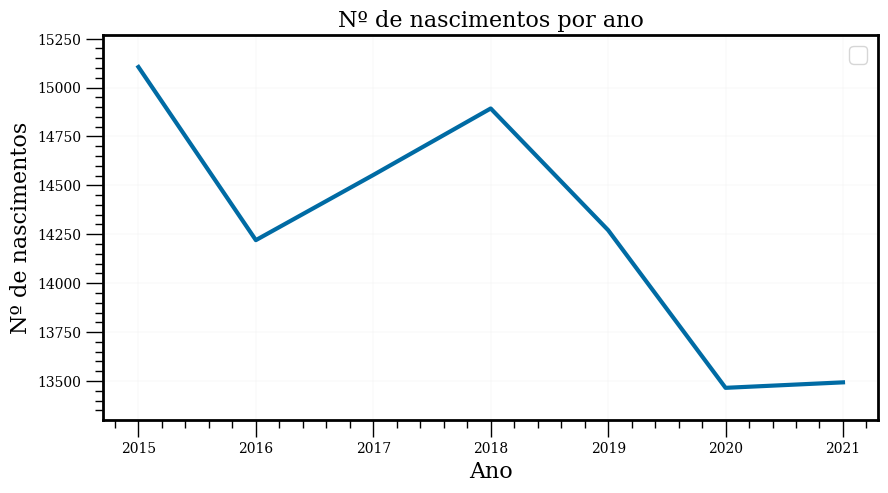

In [ ]:
fig, ax = plt.subplots()
ax.legend([''])

serie = df[['ano']].groupby('ano')['ano'].count()
serie.plot(figsize=(10, 5), fontsize=10, lw=3)

plt.xlabel('Ano')
plt.ylabel('Nº de nascimentos')
plt.title('Nº de nascimentos por ano')

#### Estados e Regiões

Text(0.5, 1.0, 'Nº de nascimentos por estado')

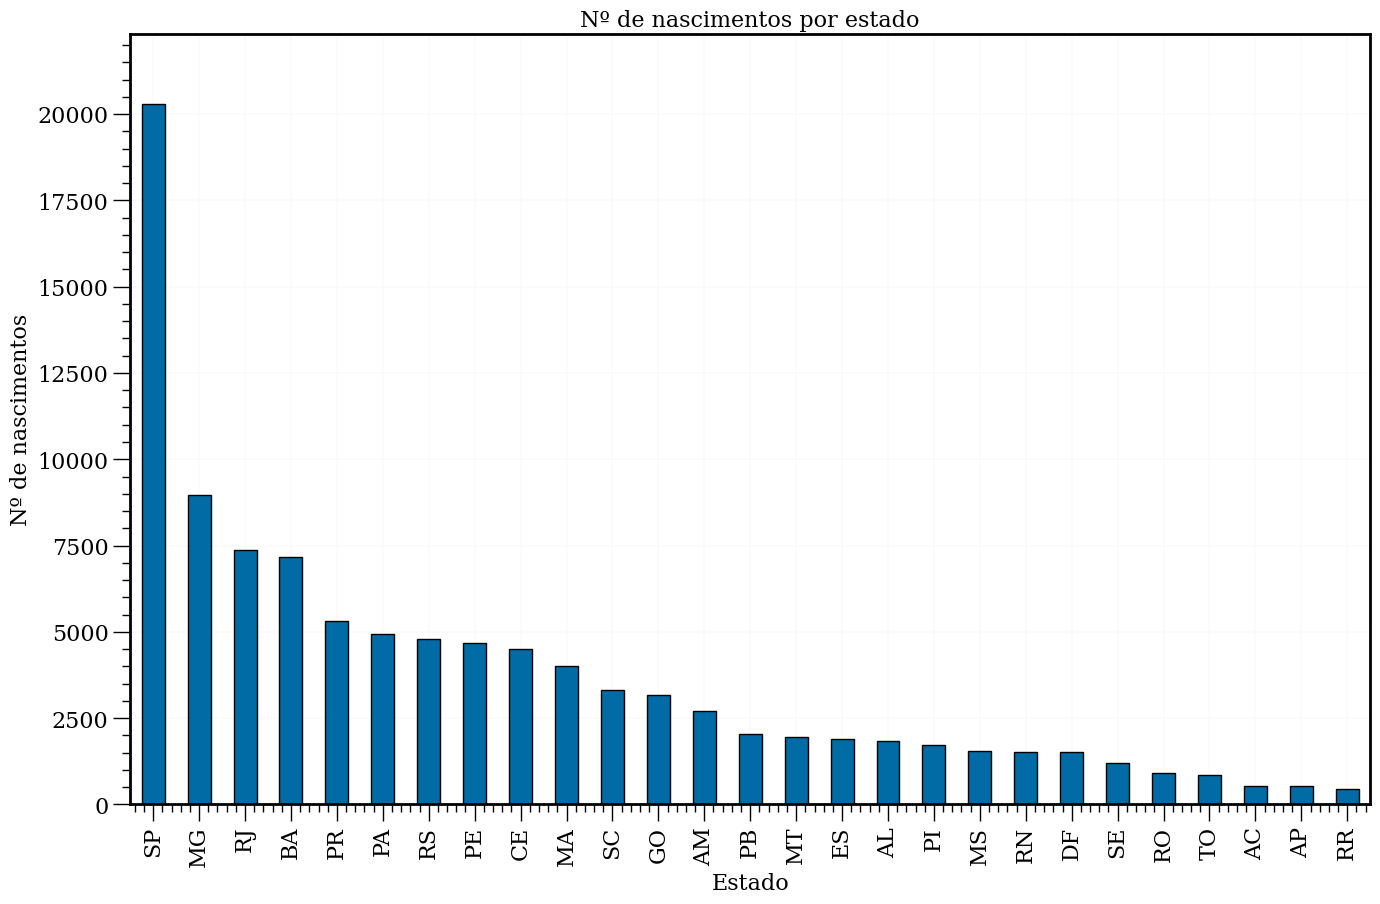

In [ ]:
uf = df.groupby('sigla_uf')['sigla_uf'].count()
uf.sort_values()[::-1].plot.bar(edgecolor='k')
plt.xlabel('Estado')
plt.ylabel('Nº de nascimentos')
plt.title('Nº de nascimentos por estado')

In [ ]:
uf_para_regiao = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'RS': 'Sul',
    'SC': 'Sul',
    'PR': 'Sul',
    'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste',
    'TO': 'Norte',
    'AC': 'Norte',
    'RO': 'Norte',
    'AM': 'Norte',
    'PA': 'Norte',
    'RR': 'Norte',
    'AP': 'Norte',
    'BA': 'Nordeste',
    'SE': 'Nordeste',
    'AL': 'Nordeste',
    'PE': 'Nordeste',
    'PB': 'Nordeste',
    'PI': 'Nordeste',
    'MA': 'Nordeste',
    'CE': 'Nordeste',
    'RN': 'Nordeste',
}

df['regiao'] = df['sigla_uf'].map(uf_para_regiao)
df[['regiao','sigla_uf']]


,regiao,sigla_uf
0,Centro-Oeste,MS
1,Norte,PA
2,Sudeste,SP
3,Nordeste,CE
4,Sudeste,ES
...,...,...
99995,Sudeste,SP
99996,Sudeste,RJ
99997,Nordeste,BA
99998,Nordeste,PB


Text(0.5, 1.0, 'Nº de nascimentos por região')

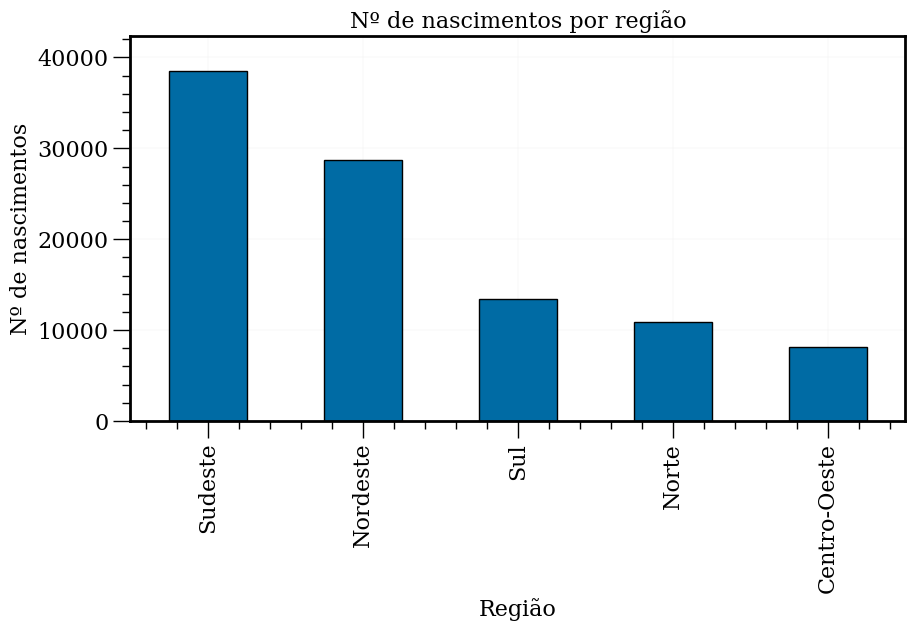

In [ ]:
regioes = df.groupby('regiao')['regiao'].count()
regioes.sort_values()[::-1].plot.bar(edgecolor='k', figsize=(10, 5))
plt.xlabel('Região')
plt.ylabel('Nº de nascimentos')
plt.title('Nº de nascimentos por região')


Text(0.5, 1.0, 'Nascimentos/população por região')

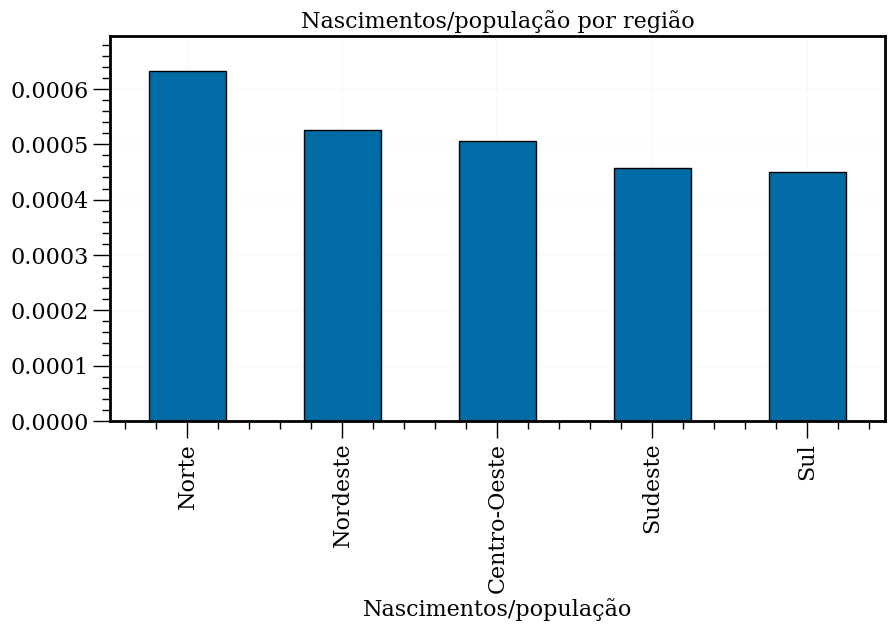

In [ ]:
# Dados do Censo Demográfico do IBGE (2022)
# https://www.ibge.gov.br/estatisticas/sociais/populacao/22827-censo-demografico-2022.html?edicao=37225&t=resultados
pop_regioes = {
    'Norte': 17267667,
    'Nordeste': 54473244,
    'Sudeste': 84361502,
    'Sul': 29776713,
    'Centro-Oeste': 16187149
}

regioes_por_populacao = regioes.copy()
for r, pop in pop_regioes.items():
    regioes_por_populacao[r] = regioes[r] / pop

regioes_por_populacao.sort_values()[::-1].plot.bar(edgecolor='k', figsize=(10, 5))
plt.xlabel('Região')
plt.xlabel('Nascimentos/população')
plt.title('Nascimentos/população por região')

### Idade dos pais

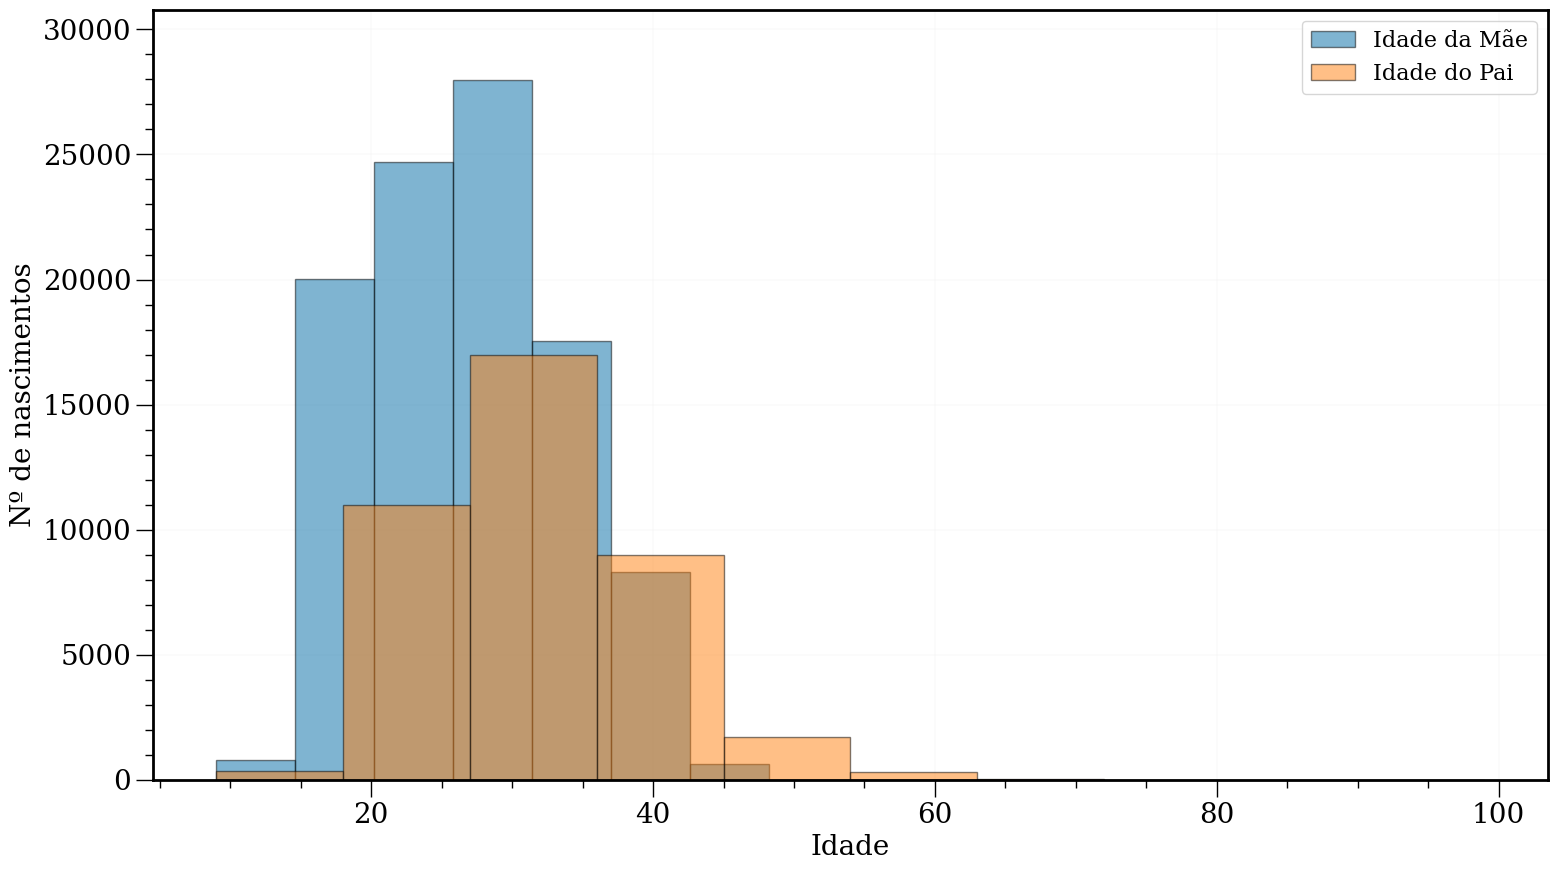

In [ ]:
plt.figure(figsize=(18, 10))
data1 = df['idade_mae']
data2 = df[df['idade_pai'] > 0]['idade_pai']
plt.xlabel('Idade')
plt.ylabel('Nº de nascimentos')
plt.hist(data1, edgecolor='k', alpha=0.5, label='Idade da Mãe')
plt.hist(data2, edgecolor='k', alpha=0.5, label='Idade do Pai')
plt.legend()
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

## Exploração com multiplas variáveis



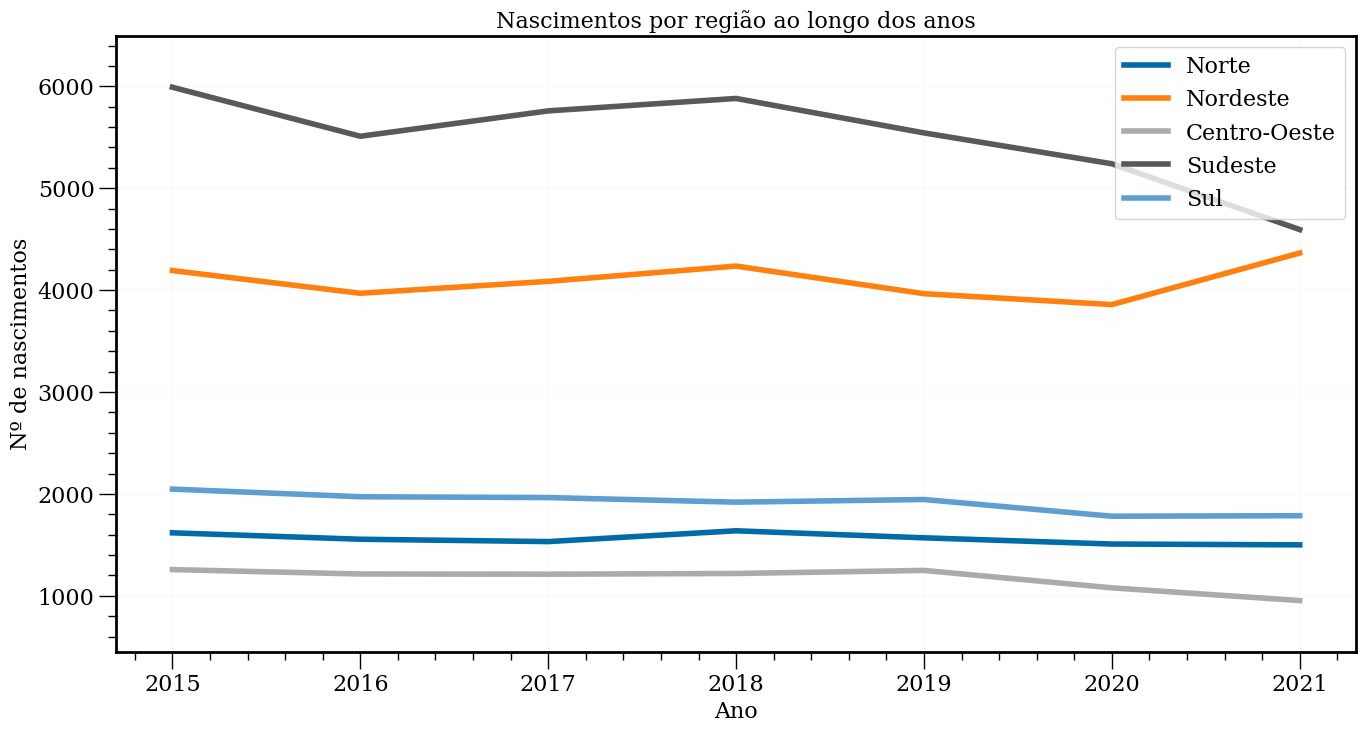

In [ ]:
plt.figure(figsize=(16, 8))

nascimentos_por_regiao = pd.DataFrame()

for regiao in ('Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'):
  nascimentos_por_regiao[regiao] = df[df['regiao']==regiao].groupby('ano')['regiao'].count()
  nascimentos_por_regiao[regiao].plot(label=regiao)

plt.title('Nascimentos por região ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Nº de nascimentos')
plt.legend()

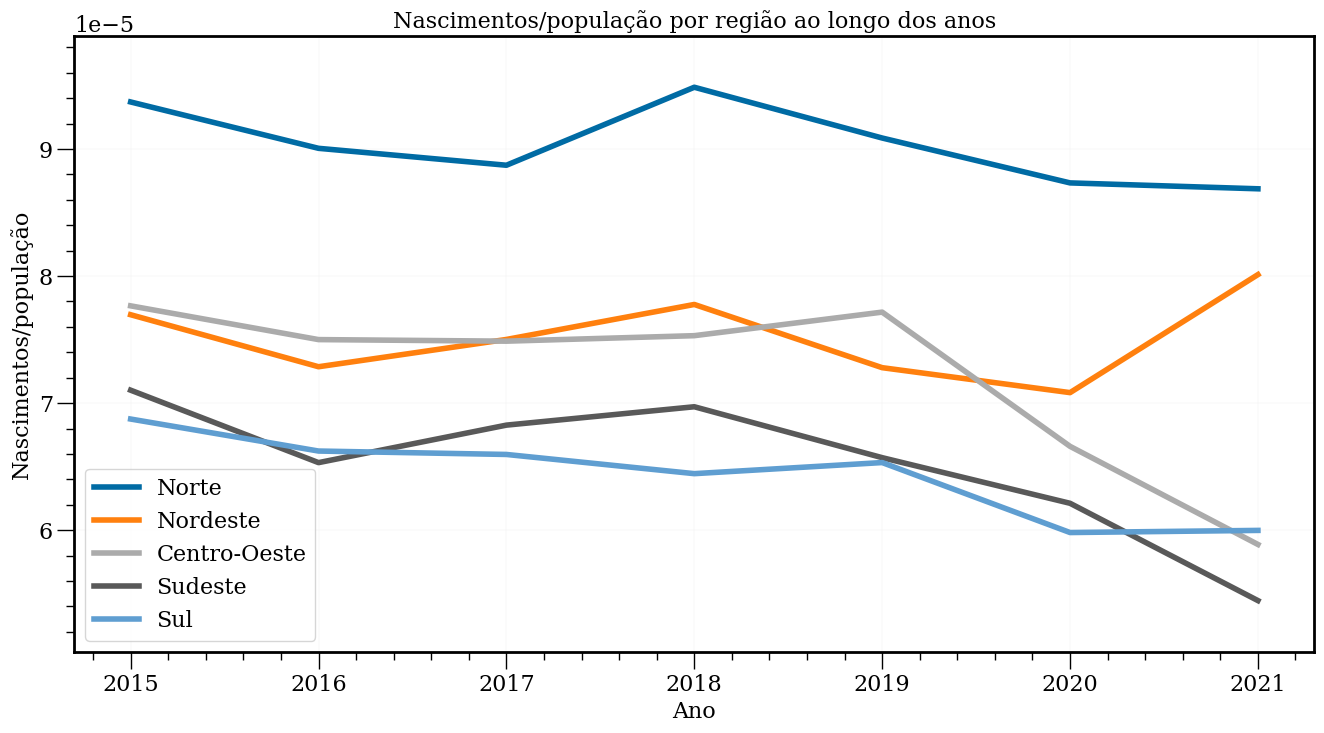

In [ ]:
regioes_por_populacao.head()

plt.figure(figsize=(16, 8))

nascimentos_por_regiao = pd.DataFrame()

for regiao in ('Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul'):
  nascimentos_por_regiao[regiao] = df[df['regiao']==regiao].groupby('ano')['regiao'].count() / pop_regioes[regiao]
  nascimentos_por_regiao[regiao].plot(label=regiao)

plt.title('Nascimentos/população por região ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Nascimentos/população')
plt.legend()

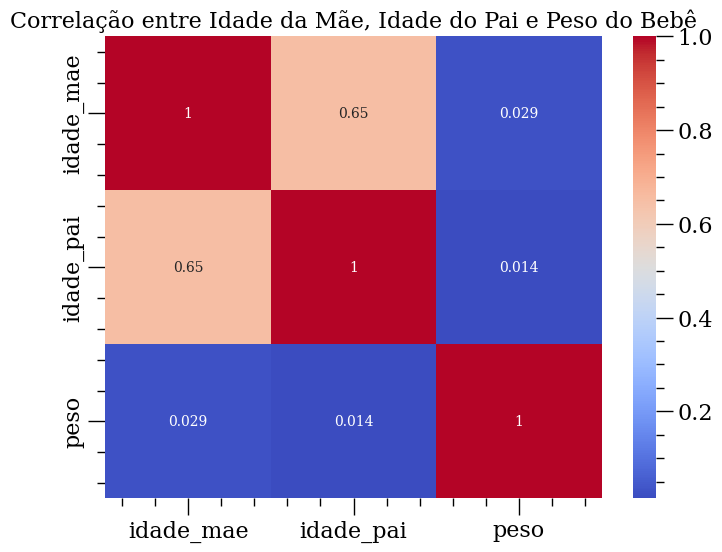

<Figure size 1000x600 with 0 Axes>

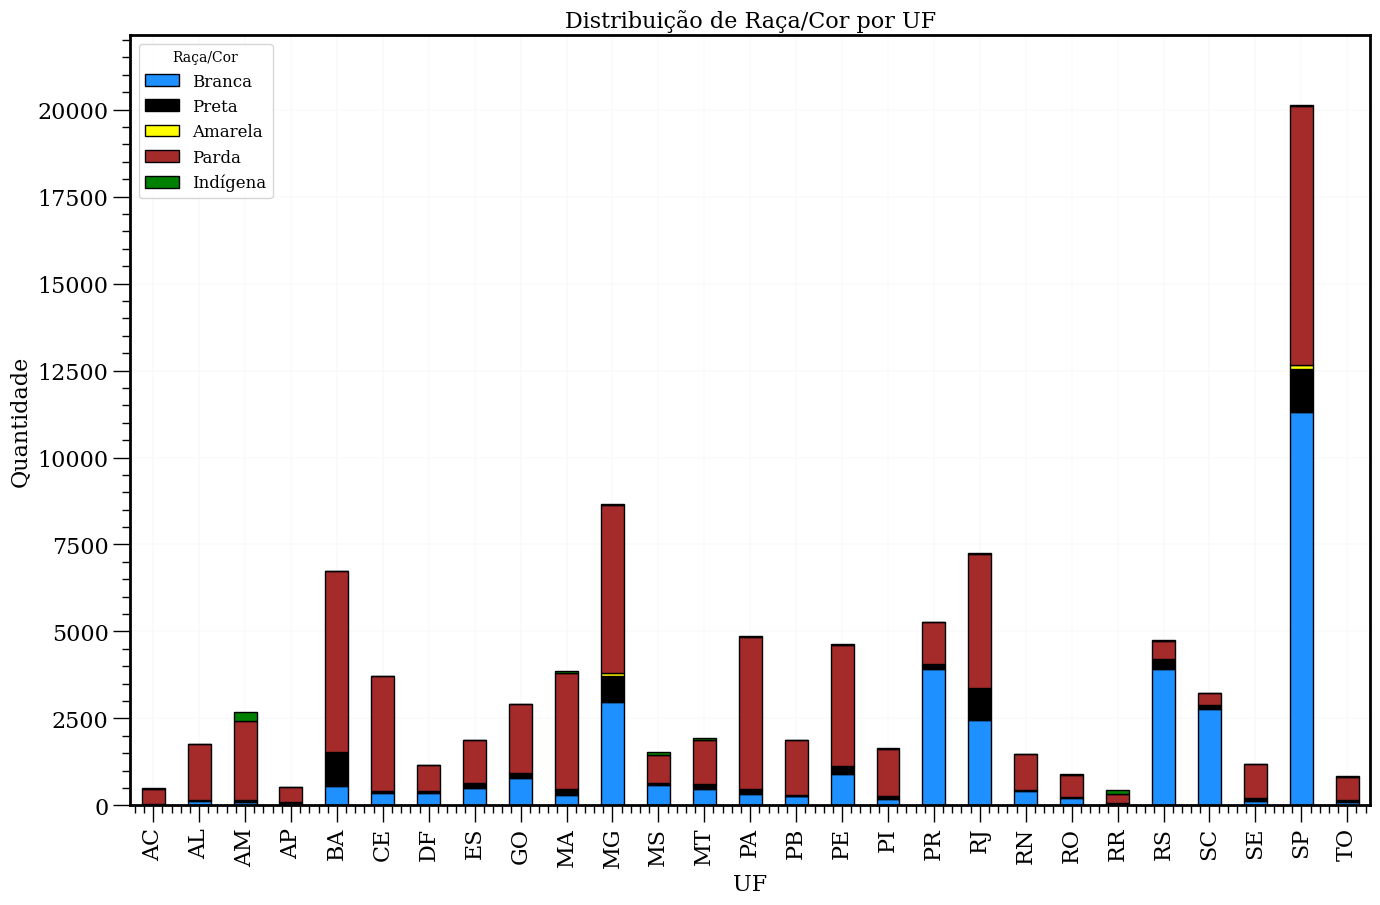

In [ ]:
import seaborn as sns

'''
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='idade_mae', y='peso', s=50)
plt.xlabel('Idade da Mãe')
plt.ylabel('Peso do Bebê (em gramas)')
plt.title('Relação entre Idade da Mãe e Peso do Bebê')
plt.show()
correlation_coef = df['idade_mae'].corr(df['peso'])
print(f"Coeficiente de correlação: {correlation_coef}")
'''


correlation_matrix = df[['idade_mae', 'idade_pai', 'peso']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre Idade da Mãe, Idade do Pai e Peso do Bebê')
plt.show()

contingency_table = pd.crosstab(df['sigla_uf'], df['raca_cor'])
legenda_raca = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena'}
contingency_table = contingency_table.rename(columns=legenda_raca)

cores = ['#1E90FF', '#000000', '#FFFF00', '#A52A2A', '#008000']

plt.figure(figsize=(10, 6))

contingency_table.plot(kind='bar', stacked=True, color=cores, edgecolor='black')

plt.xlabel('UF')
plt.ylabel('Quantidade')
plt.title('Distribuição de Raça/Cor por UF')
plt.legend(title='Raça/Cor', labels=legenda_raca.values(), fontsize='large')
plt.show()

## Exploração multivariada

  - Neste gráfico, as três variáveis originais (idade_mae, idade_pai e peso) foram reduzidas para três novas variáveis chamadas de Componentes Principais (PC1, PC2 e PC3) por meio da técnica de Análise de Componentes Principais (PCA). O eixo x representa a PC1, o eixo y representa a PC2 e o eixo z representa a PC3.

A adição do plano de projeção fornece uma visão aproximada da relação entre as variáveis originais e as Componentes Principais. Esse plano mostra como as variáveis originais são combinadas para formar as Componentes Principais. A tendência ou padrão presente nos dados é representada pelo plano de projeção.


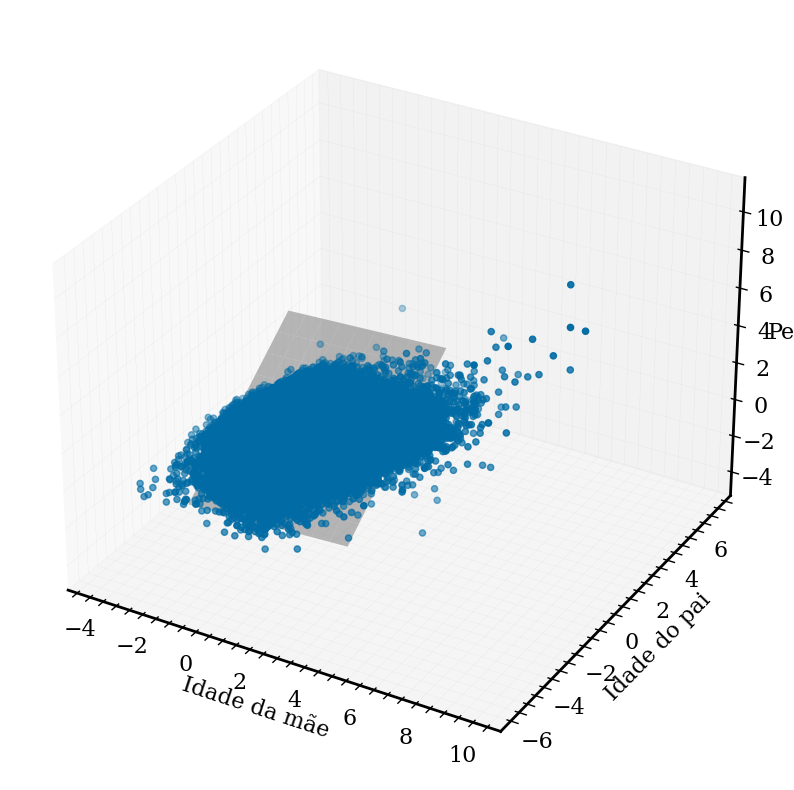

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

variables = ['idade_mae', 'idade_pai', 'peso']
data = df[variables]
imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(data)
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_filled)
pca = PCA(n_components=3)
pca.fit(data_normalized)
data_transformed = pca.transform(data_normalized)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])
ax.set_xlabel('Idade da mãe')
ax.set_ylabel('Idade do pai')
ax.set_zlabel('Peso')
xx, yy = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
zz = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape)])[:, 2]
zz = zz.reshape(xx.shape)
ax.plot_surface(xx, yy, zz, alpha=0.5, color='gray')

plt.show()

## Nascimentos por ano e estado


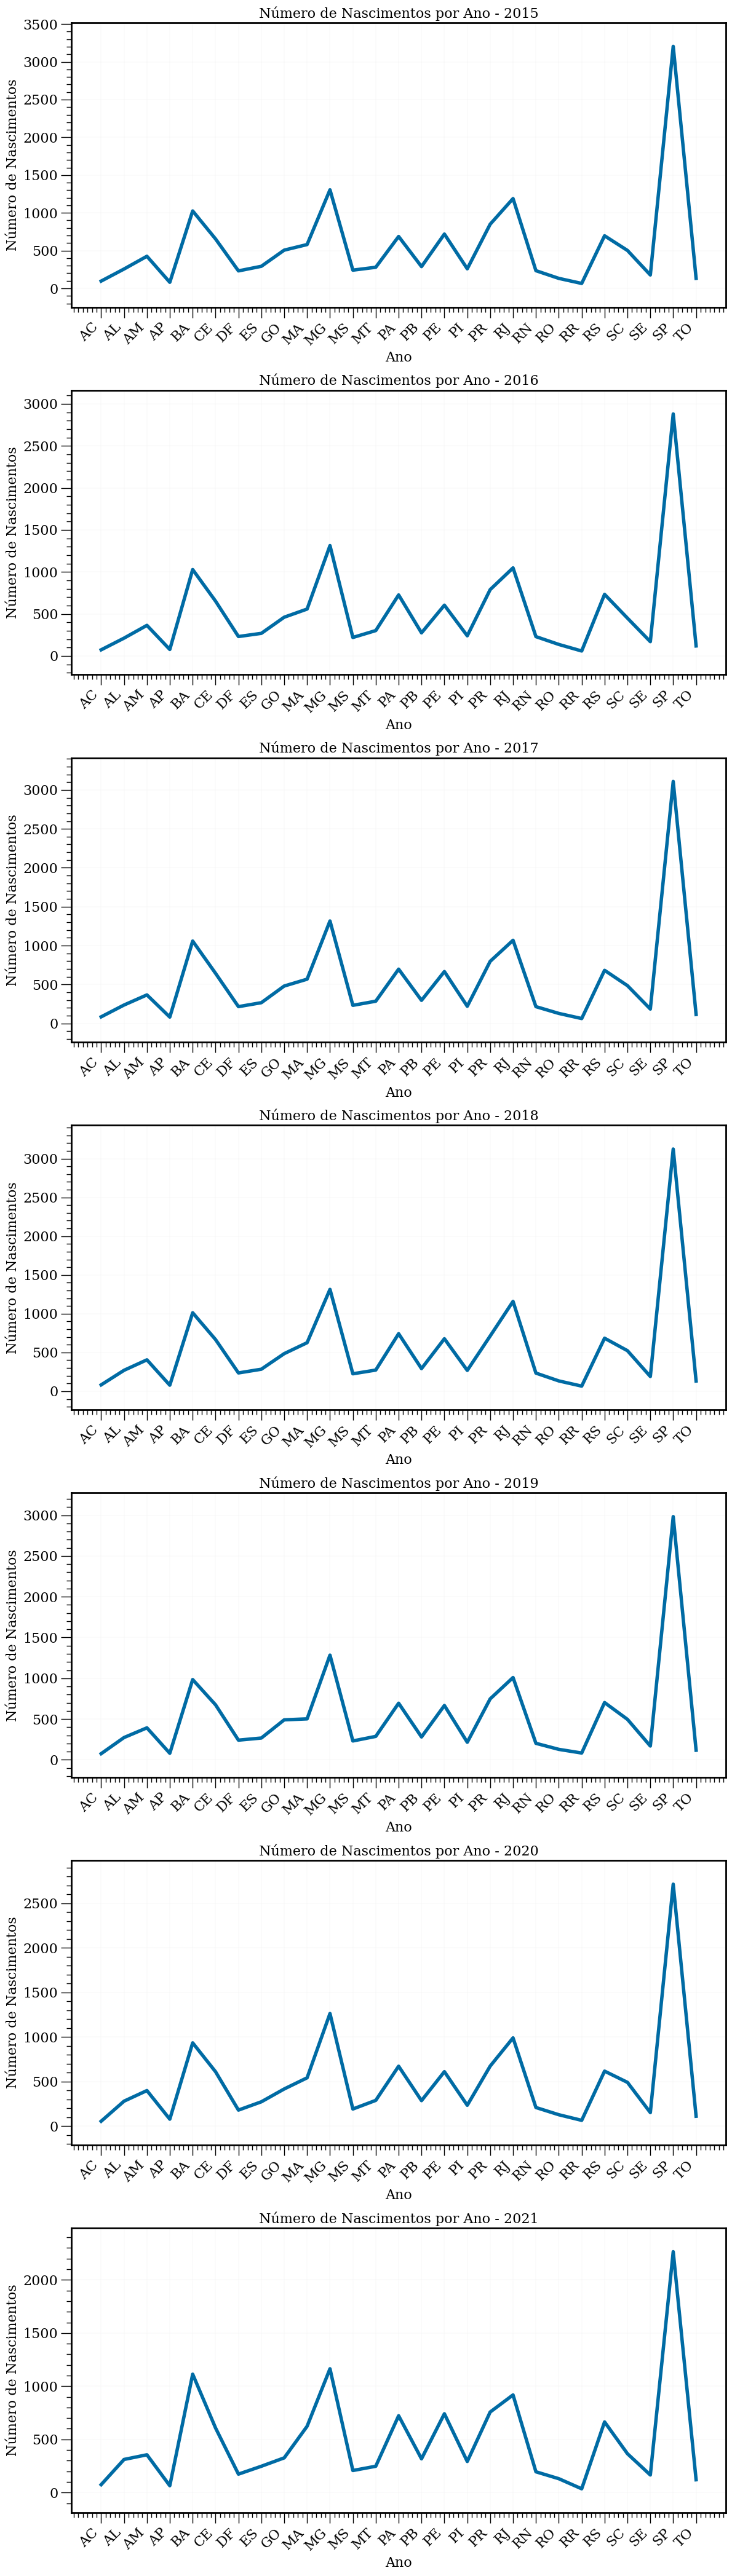

In [ ]:
df['ano'] = pd.to_datetime(df['ano'], format='%Y')
nascimentos_por_estado = df.groupby(['sigla_uf', 'ano']).size().unstack()
estados = nascimentos_por_estado.columns
num_estados = len(estados)
ano = 2015
fig, axs = plt.subplots(num_estados, 1, figsize=(12, 6*num_estados))
for i, estado in enumerate(estados):
    ax = axs[i]
    ax.plot(nascimentos_por_estado.index, nascimentos_por_estado[estado])
    ax.set_title(f'Número de Nascimentos por Ano - {ano}')
    ano=ano+1
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de Nascimentos')
    ax.grid(True)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Sumarização e conclusão

- Resumir as principais descobertas e insights obtidos durante a análise.
- Responder às perguntas iniciais e/ou resolva os problemas identificados.
- Identificar possíveis direções para análises futuras ou aprofundamento.

## Testes de hipotese

Hipotese nula: quantidade de nascidos vivos não foi afetada pelo ano pandêmico
Hipotese alternativa: foi afetada